In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Freight rate prediction/data/Container_Ocean_Freight_Rates.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,Year,Month,Container Size,Origin,Destination,Rate,Date
0,2012,Jan,20ft container,U.S. West Coast (Los Angeles),Shanghai,590,Jan 2012
1,2012,Jan,40ft container,U.S. West Coast (Los Angeles),Shanghai,770,Jan 2012
2,2012,Feb,20ft container,U.S. West Coast (Los Angeles),Shanghai,590,Feb 2012
3,2012,Feb,40ft container,U.S. West Coast (Los Angeles),Shanghai,770,Feb 2012
4,2012,Mar,20ft container,U.S. Mid West (Chicago),Shanghai,1760,Mar 2012


In [ ]:
df.shape

(564, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            564 non-null    int64 
 1   Month           564 non-null    object
 2   Container Size  564 non-null    object
 3   Origin          564 non-null    object
 4   Destination     564 non-null    object
 5   Rate            564 non-null    int64 
 6   Date            564 non-null    object
dtypes: int64(2), object(5)
memory usage: 31.0+ KB


In [ ]:
df.isnull().sum()

,0
Year,0
Month,0
Container Size,0
Origin,0
Destination,0
Rate,0
Date,0


In [ ]:
df.describe()

,Year,Rate
count,564.000000,564.000000
mean,2018.085106,1140.132979
std,3.973249,450.979154
min,2012.000000,454.000000
25%,2015.000000,750.000000
50%,2018.000000,1011.500000
75%,2022.000000,1490.000000
max,2025.000000,2720.000000


In [ ]:
df.describe(include = object)

,Month,Container Size,Origin,Destination,Date
count,564,564,564,564,564
unique,12,2,2,1,159
top,Mar,20ft container,U.S. West Coast (Los Angeles),Shanghai,Mar 2012
freq,56,282,318,564,4


In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %Y')
df = df.sort_values('Date')
df['Year_Num'] = df['Date'].dt.year
df['Month_num'] = df['Date'].dt.month

In [ ]:
catcols2 = df.select_dtypes( include = ['object']).columns
for col in catcols2:
    unique_vals = df[col].unique()
    print(f"Unique values in '{col}':")
    print(unique_vals)
    print('-' * 40)

Unique values in 'Month':
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
----------------------------------------
Unique values in 'Container Size':
['20ft container' '40ft container']
----------------------------------------
Unique values in 'Origin':
['U.S. West Coast (Los Angeles)' 'U.S. Mid West (Chicago)']
----------------------------------------
Unique values in 'Destination':
['Shanghai']
----------------------------------------


In [ ]:
df["Rate"].min()

454

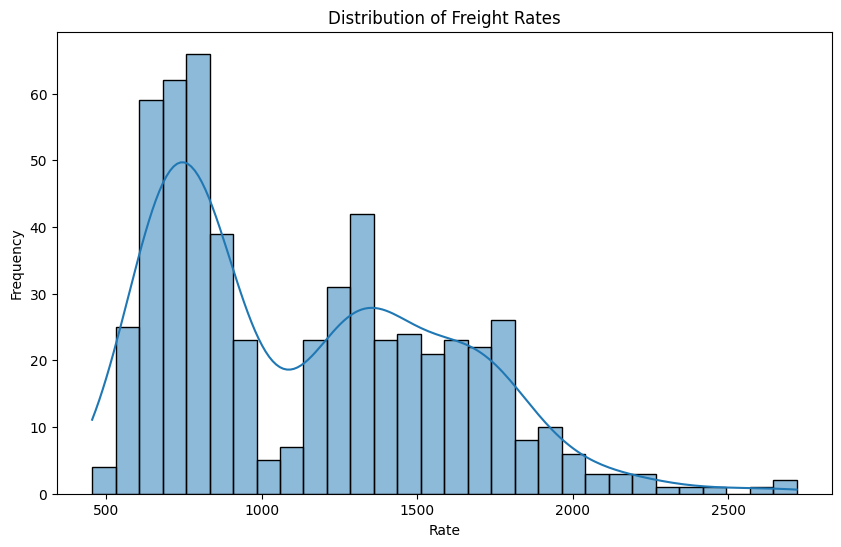

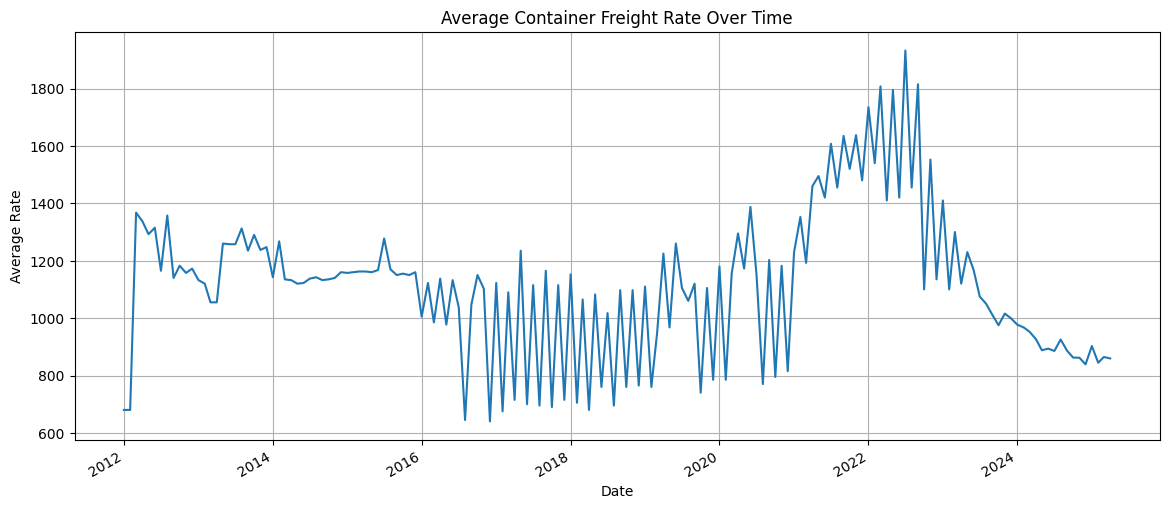

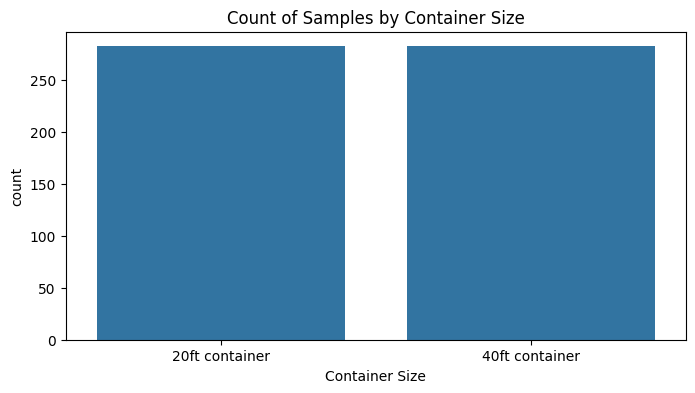

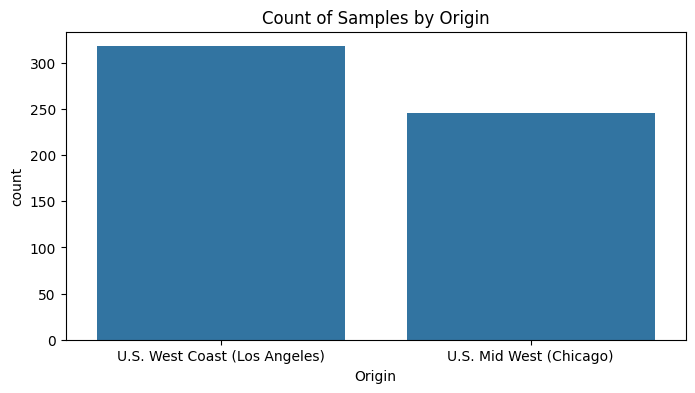

Unique Destinations: ['Shanghai']


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Rate'], bins=30, kde=True)
plt.title('Distribution of Freight Rates')
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.show()

monthly_rate = df.groupby('Date')['Rate'].mean()
plt.figure(figsize=(14,6))
monthly_rate.plot()
plt.title('Average Container Freight Rate Over Time(Monthly Trend)')
plt.xlabel('Date')
plt.ylabel('Average Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Container Size')
plt.title('Count of Samples by Container Size')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Origin')
plt.title('Count of Samples by Origin')
plt.show()

# Freight rates vary from 454 to 2720 USD, with a skew toward lower-mid values.
# Average freight rate shows a general upward trend over time with seasonal fluctuations.
# 20ft, 40ft containers are almost the same in count
# Shipments originating from the U.S. West Coast are slightly higher then U.S. Mid West; only one destination (Shanghai)

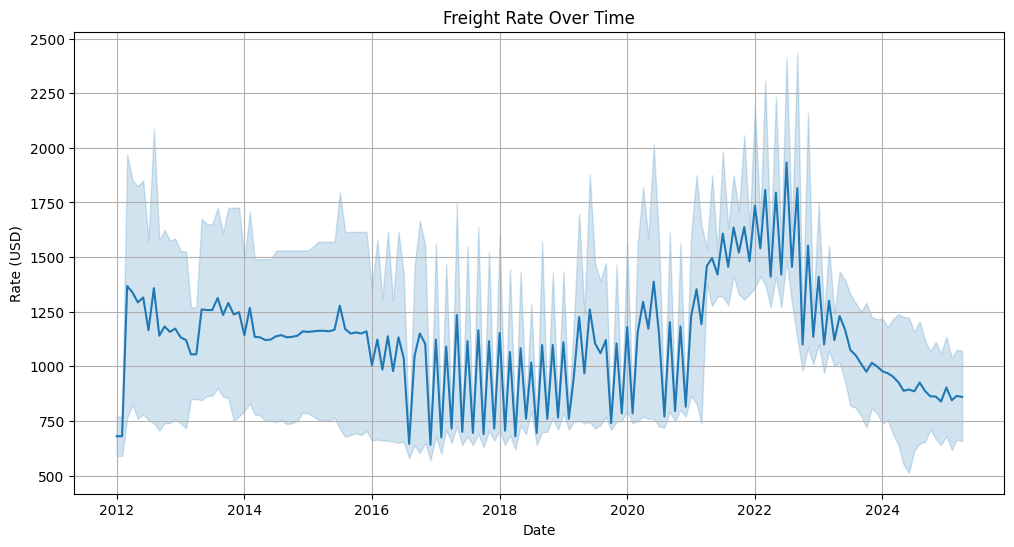

In [ ]:
# Monthly Average Rate
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Rate', data=df)
plt.title('Freight Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (USD)')
plt.grid(True)
plt.show()

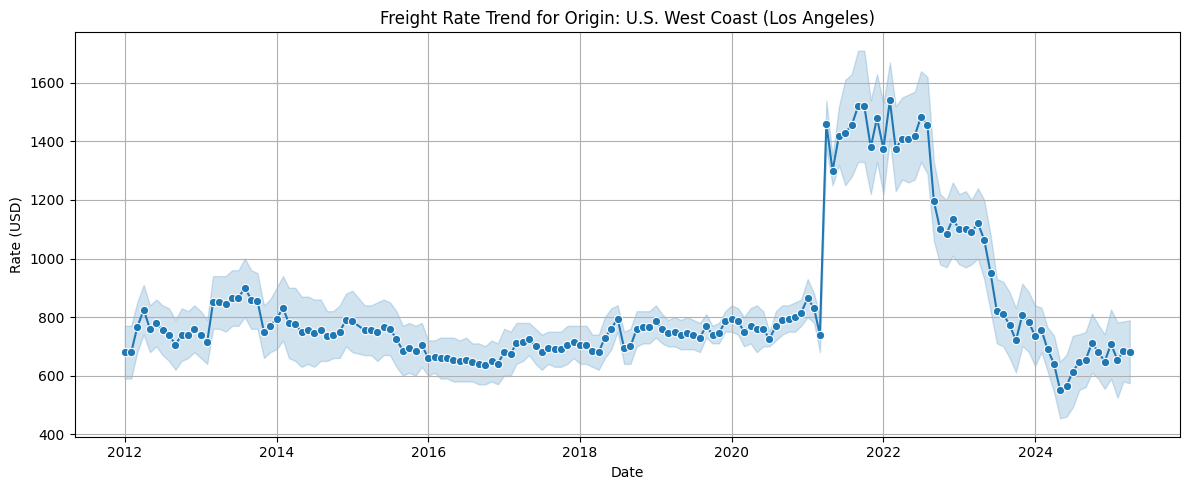

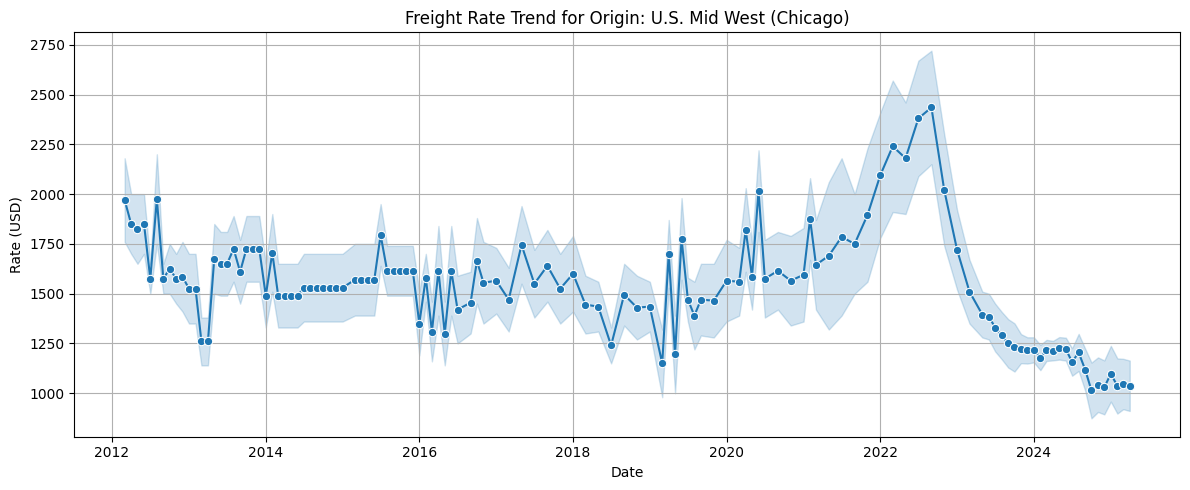

In [ ]:
origins = df['Origin'].unique()
for origin in origins:
    plt.figure(figsize=(12, 5))
    origin_data = df[df['Origin'] == origin]
    sns.lineplot(data=origin_data, x='Date', y='Rate', marker='o')
    plt.title(f'Freight Rate Trend for Origin: {origin}')
    plt.xlabel('Date')
    plt.ylabel('Rate (USD)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

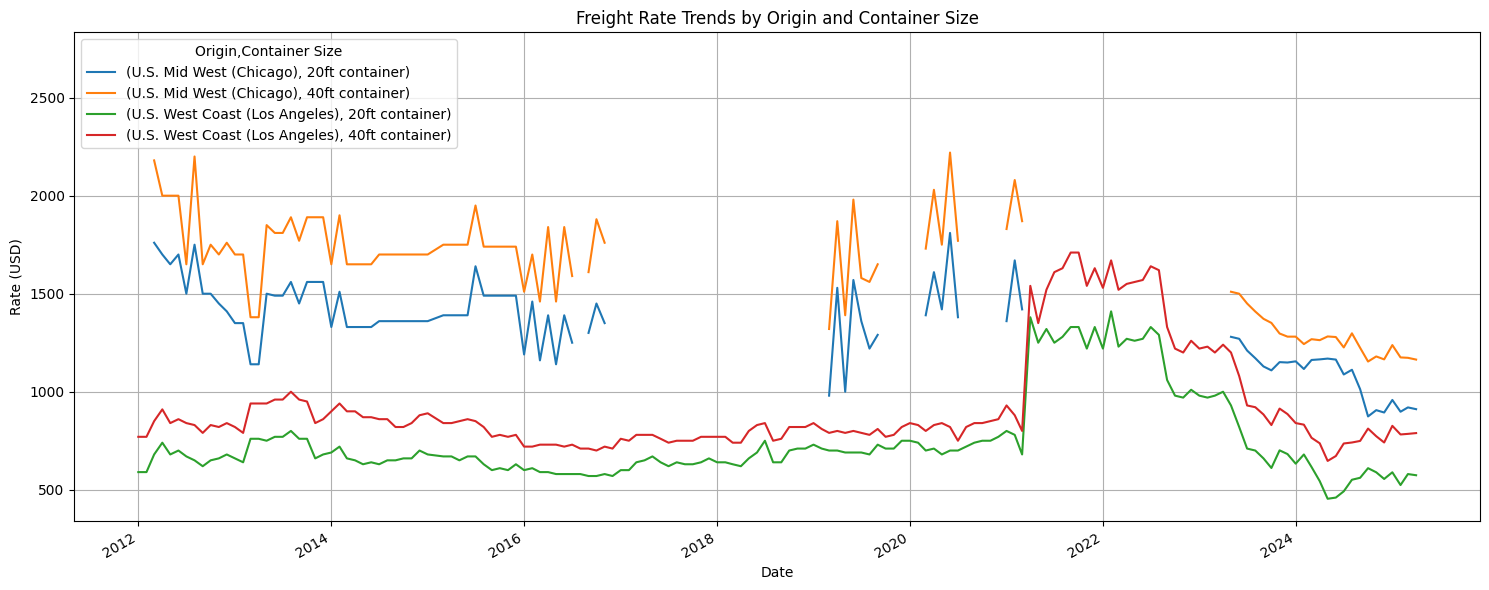

'\nFreight rates show several spikes.\nRates vary by origin and container size.\nU.S. West Coast routes rates have different dynamics than U.S. Mid West.\n40ft containers have higher rates than 20ft containers (expected).\nThere are visible peaks around 2020-2023, likely linked to COVID-19 disruptions and supply chain issues.\n'

In [ ]:
pivot = df.pivot_table(index='Date', columns=['Origin', 'Container Size'], values='Rate')

pivot.plot(figsize=(15, 6), title='Freight Rate Trends by Origin and Container Size')
plt.ylabel("Rate (USD)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


"""
Freight rates show several spikes.
Rates vary by origin and container size.
U.S. West Coast routes rates have different dynamics than U.S. Mid West.
40ft containers have higher rates than 20ft containers (expected).
There are visible peaks around 2020-2023, likely linked to COVID-19 disruptions and supply chain issues.
"""



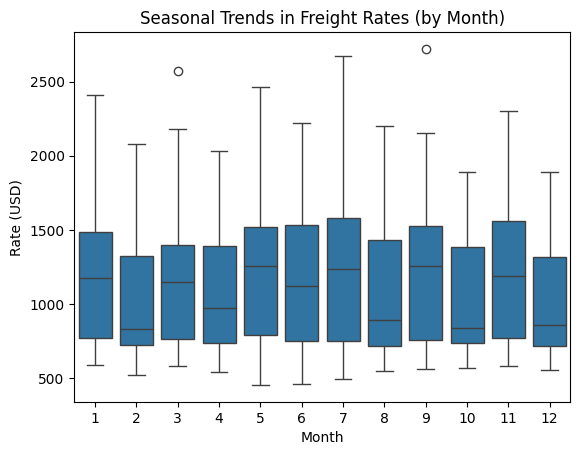

In [ ]:
df['Month_Num'] = df['Date'].dt.month
sns.boxplot(data=df, x='Month_Num', y='Rate')
plt.title('Seasonal Trends in Freight Rates (by Month)')
plt.xlabel("Month")
plt.ylabel("Rate (USD)")
plt.show()

<ipython-input-29-c5b41043e7ae>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Rate', hue='Container Size', ci=None)


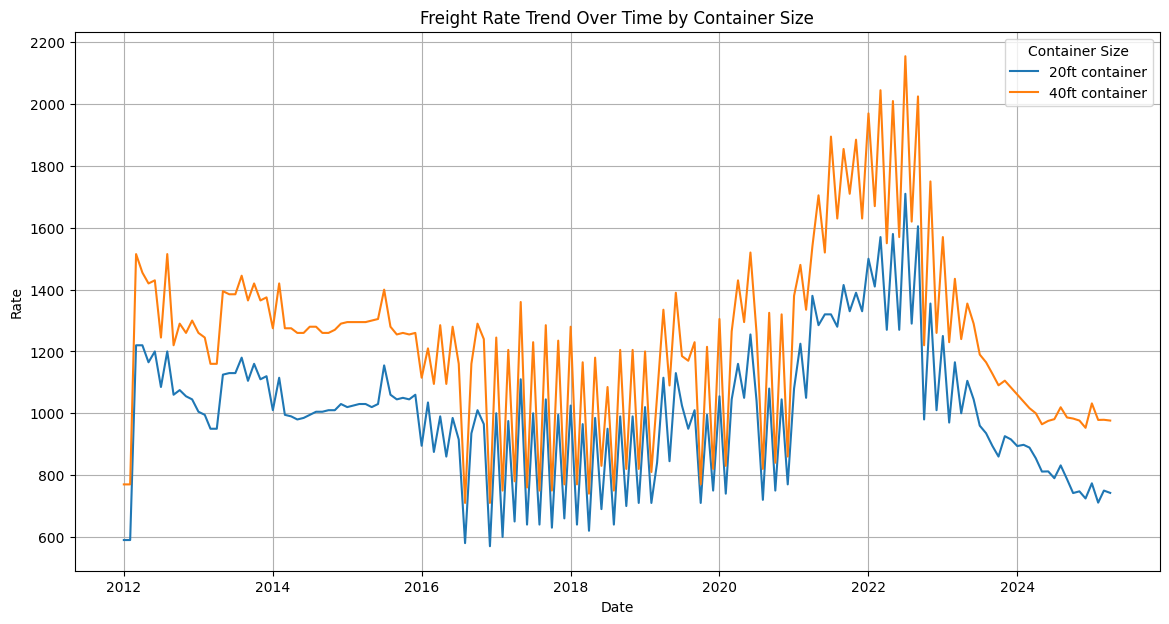

In [ ]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='Date', y='Rate', hue='Container Size', ci=None)
plt.title('Freight Rate Trend Over Time by Container Size')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.grid(True)
plt.show()

# 40ft containers consistently cost more (about $200 higher).
# Their trends are same as for those of 20ft containers, indicating the same market forces apply to both sizes.

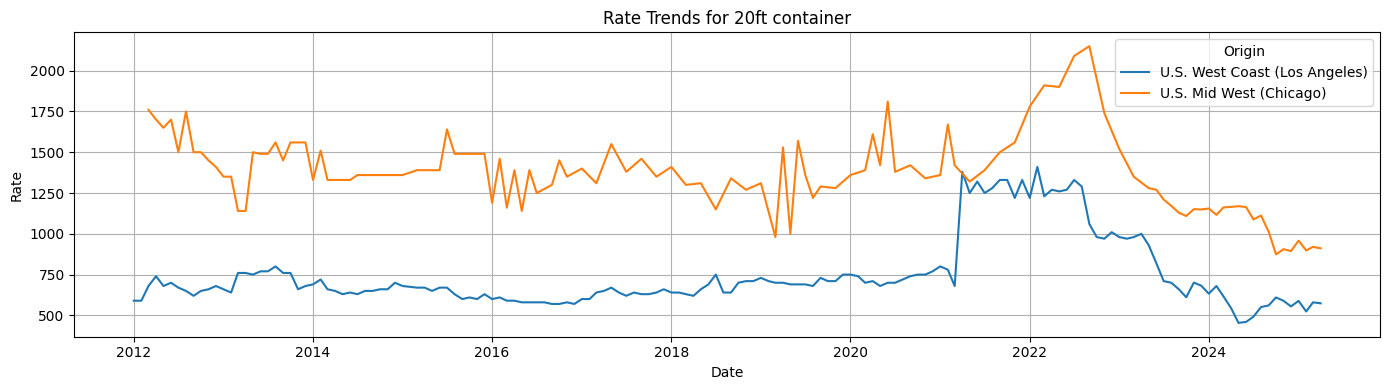

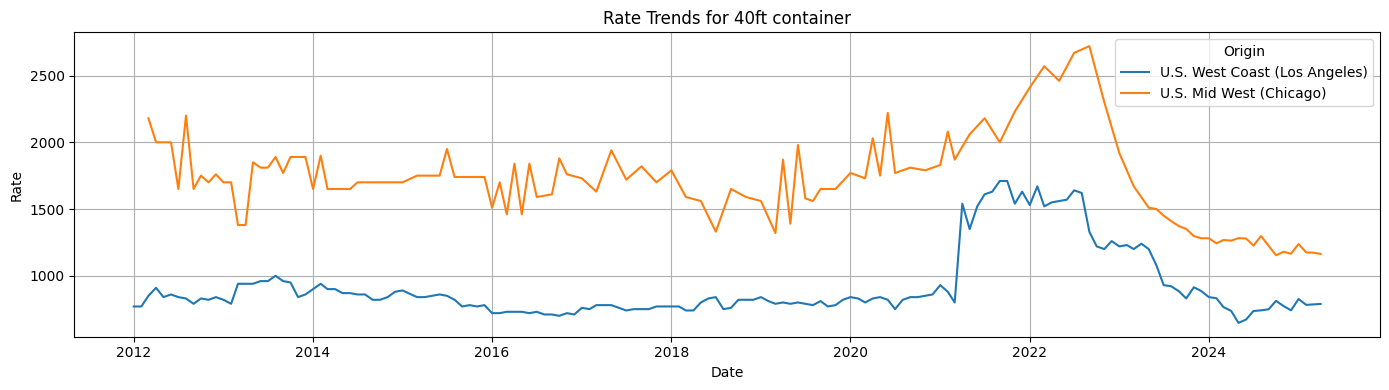

'\n- Both origins follow overall similar trends but differ in magnitude.\n- Sharp rate increases during 2020-2023 coincide with pandemic-related shipping constraints.\n- Differences between container sizes are same across origins.\n'

In [ ]:
for container in df['Container Size'].unique():
    plt.figure(figsize=(14, 4))
    sub_df = df[df['Container Size'] == container]
    sns.lineplot(data=sub_df, x='Date', y='Rate', hue='Origin')
    plt.title(f'Rate Trends for {container}')
    plt.ylabel("Rate")
    plt.xlabel("Date")
    plt.legend(title='Origin')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

"""
- Both origins follow overall similar trends but differ in magnitude.
- Sharp rate increases during 2020-2023 coincide with pandemic-related shipping constraints.
- Differences between container sizes are same across origins.
"""




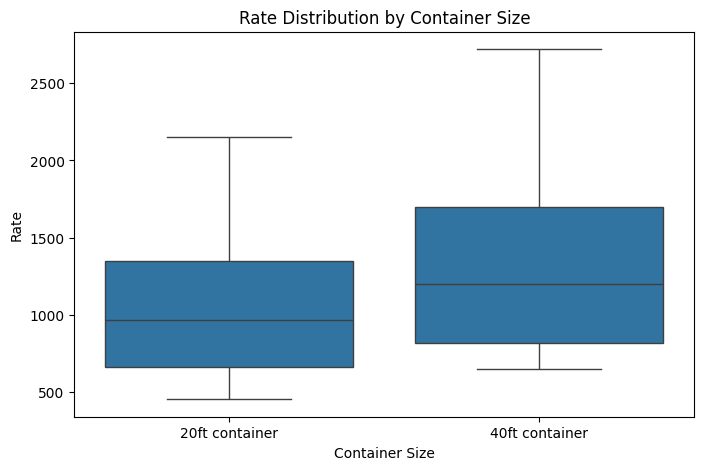

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Container Size', y='Rate', data=df)
plt.title('Rate Distribution by Container Size')
plt.show()

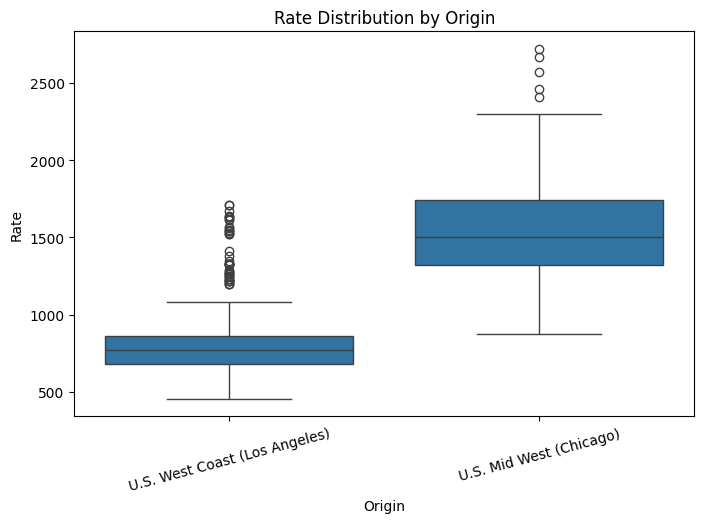

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Origin', y='Rate', data=df)
plt.title('Rate Distribution by Origin')
plt.xticks(rotation=15)
plt.show()

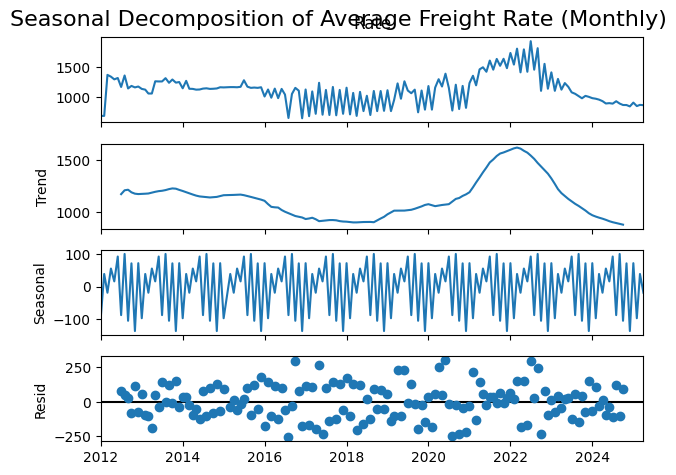

In [ ]:
monthly_avg_rate = df.groupby('Date')['Rate'].mean()
# Decompose time series
result = seasonal_decompose(monthly_avg_rate, model='additive', period=12)

result.plot()
plt.suptitle('Seasonal Decomposition of Average Freight Rate (Monthly)', fontsize=16)
plt.show()


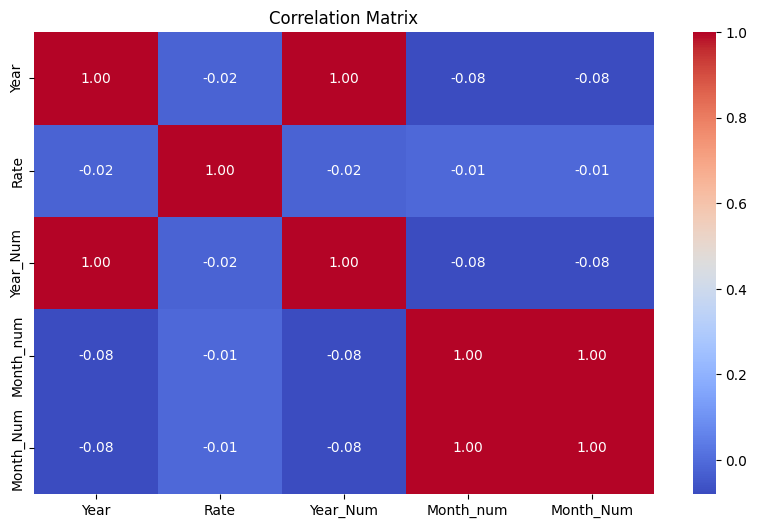

In [ ]:
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.describe(include = object)

In [ ]:
# Encode month as cyclical features to capture seasonal freight patterns
df['Month_Sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
df['Month_Cos'] = np.cos(2 * np.pi * df['Month_num'] / 12)

# Filter datasets by container size
df_20ft = df[df['Container Size'] == '20ft container'].copy()
df_40ft = df[df['Container Size'] == '40ft container'].copy()

In [ ]:
df_20ft_arima = df_20ft[['Date', 'Rate']].copy()
df_20ft_arima['Date'] = pd.to_datetime(df_20ft_arima['Date'])
df_20ft_arima.set_index('Date', inplace=True)

df_40ft_arima = df_40ft[['Date', 'Rate']].copy()
df_40ft_arima['Date'] = pd.to_datetime(df_40ft_arima['Date'])
df_40ft_arima.set_index('Date', inplace=True)


In [ ]:
def preprocess_lstm_rnn(df):
    df_lstm = df.copy()
    df_lstm['Date'] = pd.to_datetime(df_lstm['Date'])

    # Log-transform the 'Rate'
    df_lstm['log_rate'] = np.log1p(df_lstm['Rate'])

    # One-hot encode 'Origin'
    df_lstm = pd.get_dummies(df_lstm, columns=['Origin'], drop_first=True)

    origin_cols = [col for col in df_lstm.columns if col.startswith('Origin_')]
    input_features = ['Month_Sin', 'Month_Cos'] + origin_cols

    df_lstm_final = df_lstm[['Date', 'log_rate'] + input_features].copy()

    # Scale only the input features
    scaler = MinMaxScaler()
    df_lstm_final[input_features] = scaler.fit_transform(df_lstm_final[input_features])

    return df_lstm_final


In [ ]:
df_20ft_lstm = preprocess_lstm_rnn(df_20ft)
df_40ft_lstm = preprocess_lstm_rnn(df_40ft)


In [ ]:
project_path = '/content/drive/MyDrive/Freight rate prediction'
data_path = f'{project_path}/data'


In [ ]:
# Save all preprocessed datasets
df_20ft_arima.to_csv(f"{data_path}/df_20ft_arima.csv")
df_40ft_arima.to_csv(f"{data_path}/df_40ft_arima.csv")

df_20ft_lstm.to_csv(f"{data_path}/df_20ft_lstm.csv", index=False)
df_40ft_lstm.to_csv(f"{data_path}/df_40ft_lstm.csv", index=False)


In [ ]:
df_20ft_arima.head()

,Rate
Date,
2012-01-01,590
2012-02-01,590
2012-03-01,1760
2012-03-01,680
2012-04-01,740


Mounted at /content/drive
